# DATA  ANALYSIS OF SUICIDES IN INDIA

One of the greatest news that ran through Indian news channels in 2020 after Covid-19 is Bollywood Actor Sushant Singh Rajput's suicide mystery. While the police are yet to decide whether it was a suicide or murder, why not lets have a look at how many people are commiting suicides in India every year.

Suicide is considered a major health problem around the world. This project is an attempt to analyze the no of suicides that are done every year in India and to know the reasons for them to commit suicide,like what are the main causes,how many people are dying each year,which states have the highest suicide ratio etc.

According to wikipedia,in 2016 the number of suicides in India had increased to 230,314. Suicide was the most common cause of death in both the age groups of 15–29 years and 15–39 years. About 800,000 people die by suicide worldwide every year, of these 135,000 (17%) are residents of India, a nation with 17.5% of world population. So its a very big number hence big reason to worry why so many people are giving up on their lifes.

For our analysis,the dataset we have used is from official India Government's dataset, but since many times their server doesnt work properly so we picked up the dataset from kaggle dataset library. However care is to be taken that the dataset is old and has values from year 2001 to 2012 only so we cant analyse the present scenario, but we can certainly look at the general trend and have a fair idea about current day status. So lets start with our analysis. After the work will be finished,it will be uploaded to www.jovian.ml

## Downloading the Dataset

We have used Kaggle dataset library to fetch our required dataset, and opendatasets python library to download and extract it.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Change this
dataset_url = 'https://www.kaggle.com/rajanand/suicides-in-india' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  rajanand/suicides-in-india


0it [00:00, ?it/s]

 81%|████████  | 1064960/1312915 [00:04<00:00, 495814.66it/s]

Extracting archive ./suicides-in-india.zip to ./suicides-in-india


The dataset has been downloaded and extracted.

In [3]:
# Change this
data_dir = './suicides-in-india'

1318912it [00:19, 495814.66it/s]                             

In [4]:
import os
os.listdir(data_dir)

['Suicides in India 2001-2012.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "suicides-in-india" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [6]:
import jovian

1318912it [00:39, 33142.98it/s] 


<IPython.core.display.Javascript object>

In [7]:
jovian.commit(project=project_name,environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "email-rkroy/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/email-rkroy/suicides-in-india


'https://jovian.ml/email-rkroy/suicides-in-india'

## Data Preparation and Cleaning

First we need to prepare our data. Our data doesnt have any NAN values fortunately, but it has too many redundant rows having 0 values which needs to be removed. For that lets load the data into a dataframe and then remove all useless rows that have 0 as entries. After that our data will be ready to use.


In [8]:
import pandas as pd

In [9]:
suicide_df=pd.read_csv('./suicides-in-india/Suicides in India 2001-2012.csv')

In [10]:
suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [124]:
suicide_df=suicide_df[suicide_df['Total']!=0] 
# this is to remove all rows having 0 as value

In [12]:
suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


How many rows and columns does the dataset has?

In [13]:
suicide_df.shape

(102038, 7)

Thus from the shape function it is known that our dataset has 1,02,038 rows and 7 columns.

List of all states in our dataset

In [14]:
suicide_df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

Info about our dataset

In [15]:
suicide_df.info

<bound method DataFrame.info of                 State  Year      Type_code                           Type  \
13      A & N Islands  2001         Causes                   Love Affairs   
20      A & N Islands  2001         Causes  Other Causes (Please Specity)   
32      A & N Islands  2001         Causes        Other Prolonged Illness   
47      A & N Islands  2001         Causes         Failure in Examination   
54      A & N Islands  2001         Causes        Other Prolonged Illness   
...               ...   ...            ...                            ...   
237514    West Bengal  2012  Social_Status                      Seperated   
237515    West Bengal  2012  Social_Status                Widowed/Widower   
237516    West Bengal  2012  Social_Status                        Married   
237517    West Bengal  2012  Social_Status                       Divorcee   
237518    West Bengal  2012  Social_Status                  Never Married   

        Gender Age_group  Total  
13      F

List of all column names

In [16]:
suicide_df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

Now lets take a look at the columns in this dataset:-

1. State : Name of the state in India.

2. Year : The year in which suicides were committed.

3. Type_code : It has two values which are causes and profession.

4. Type : It consists of various factors and causes of death.

5. Gender : Male or Female.

6. Age_group : It consists of various age groups.
7. Total : It consists of total number of suicides in that particular row.

Our suicide dataframe is now ready for use

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "email-rkroy/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/email-rkroy/suicides-in-india


'https://jovian.ml/email-rkroy/suicides-in-india'

## Exploratory Analysis and Visualization

In this section we are going to analyse our dataset and try to present the results graphically so that it will be easy to draw conclusions by seeing the graph.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Let us first calculate the total number of suicides that happened in between 2001-2012

In [20]:
total_suicides=suicide_df.Total.sum()

In [21]:
print("Total {} suicides were performed from 2001-2012".format(total_suicides))

Total 13071734 suicides were performed from 2001-2012


In [22]:
suicide_yearwise_df=suicide_df.groupby('Year').sum()

In [23]:
suicide_yearwise_df

,Total
Year,
2001,976464
2002,993648
2003,997622
2004,1023137
2005,1025201
2006,1062991
2007,1103667
2008,1125082
2009,1144033


Let us plot the deaths to analyse the trend

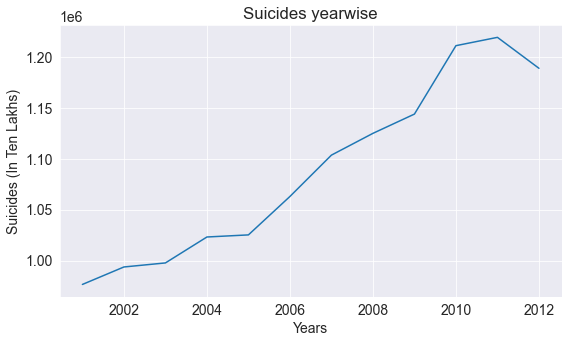

In [24]:
plt.title("Suicides yearwise")
plt.plot(suicide_yearwise_df)
plt.xlabel("Years")
plt.ylabel("Suicides (In Ten Lakhs)");

We can clearly see that the significant slope in graph came in year 2005-2006 and further in 2009-2011. The year 2011 experienced the maximum number of suicides. During these years the number of suicides rose from previous years.

The good news is we can see that the slope is decresing in year 2011-2012.

### Let us now find that what are the top states in India in which number of suicides are higher.

In [25]:
grp = suicide_df.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)
total_suicides = total_suicides[2:]

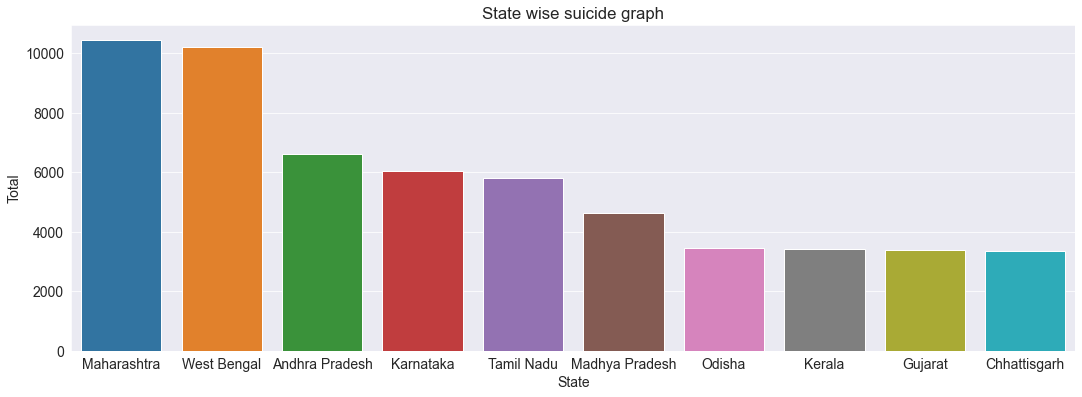

In [118]:
fig , ax = plt.subplots(figsize=(18,6))
g=sns.barplot(x='State',y='Total',data=total_suicides)
plt.title("State wise suicide graph")
g.set_xticklabels(g.get_xticklabels());

Clearly we can see the top states from the above graph which are Maharashtra , West Bengal , Tamilnadu , Andhra Pradesh and Karnataka.

Also we can notice that states like Tripura, Himachal pradesh, Uttarakhand, Goa, Arunachal pradesh experienced the least amount of suicides.

### Now we shall explore and visualise the different factors present in type_codes column..

In [27]:
suicide_df['Type_code'].value_counts()

Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         6176
Social_Status            3703
Name: Type_code, dtype: int64

Clearly we have 5 categories. Let us explore all the categories.


**1. CAUSES**

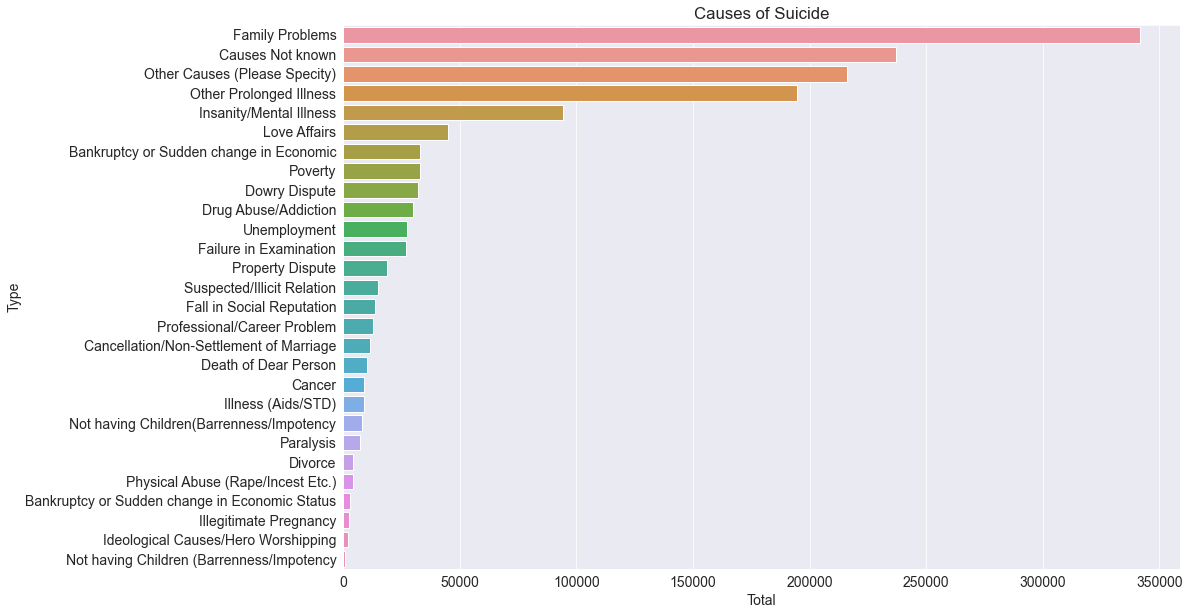

In [41]:
data1 = suicide_df[suicide_df['Type_code']=='Causes']
reasons = data1.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
plt.figure(figsize=(15,10))
plt.title("Causes of Suicide")
sns.barplot(y='Type',x='Total',data=suicide_reasons);

From the above graph we can clearly see the top reasons for suicide. Family problems is the most frequent reason for suicide.

Let us now analyse the next factor.

**2. MEANS_ADOPTED**

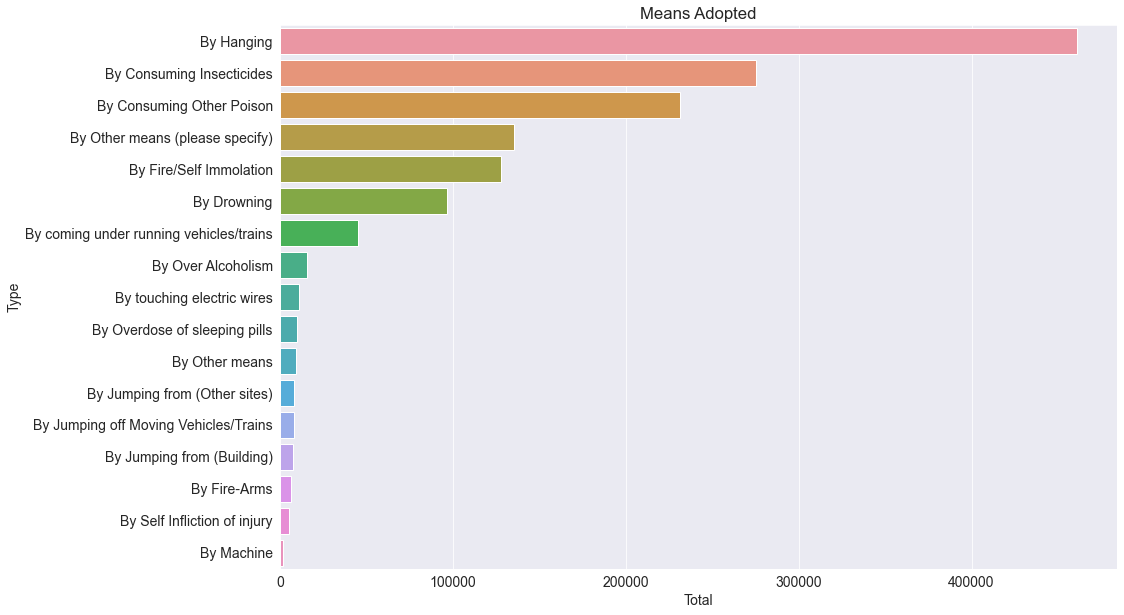

In [42]:
data2 = suicide_df[suicide_df['Type_code']=='Means_adopted']
reasons = data2.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
plt.figure(figsize=(15,10))
plt.title('Means Adopted')
sns.barplot(y='Type',x='Total',data=suicide_reasons);

Clearly we can see the top means of suicide in india , in which most people commit suicide by hanging.

**3. PROFESSIONAL PROFILE**

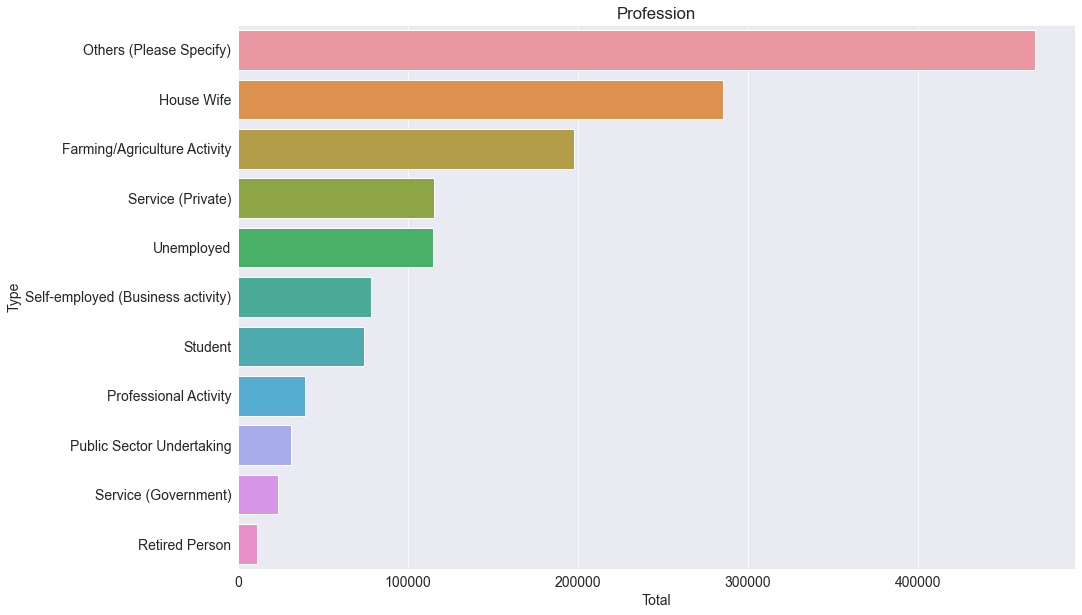

In [43]:
data3 = suicide_df[suicide_df['Type_code']=='Professional_Profile']
reasons = data3.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
plt.figure(figsize=(15,10))
plt.title('Profession')
sns.barplot(y='Type',x='Total',data=suicide_reasons);

Here we can see that in which occupattion people are committing more number of suicides . May be this can help a lot in improving working conditions over this occupations.

One interesting thing here to note is the number of people committing suicides in private job sector and unemployed people are almost equal.

**4. EDUCATION STATUS**

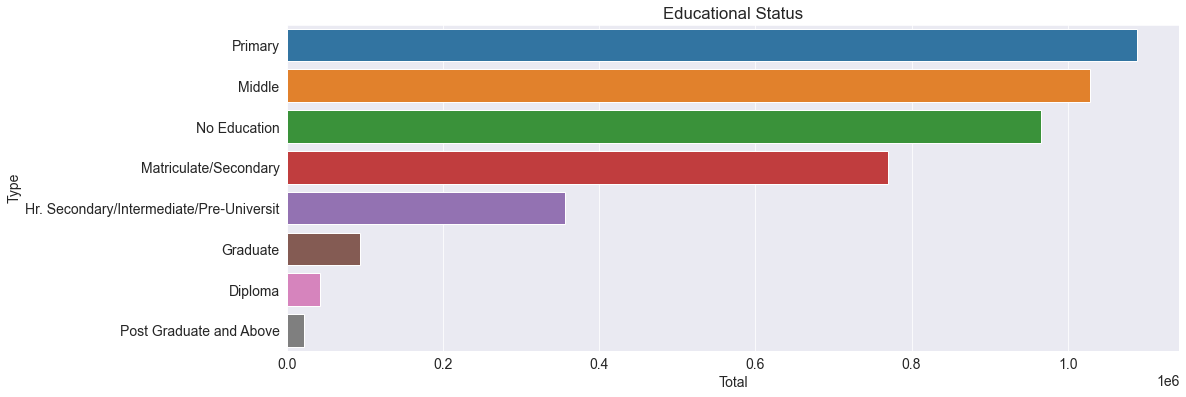

In [31]:
data4 = suicide_df[suicide_df['Type_code']=='Education_Status']
reasons = data4.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
plt.figure(figsize=(16,6))
plt.title('Educational Status')
sns.barplot(y='Type',x='Total',data=suicide_reasons);

The above graph depicts the educational quaification of the people who committed suicide.

**5. SOCIAL STATUS**

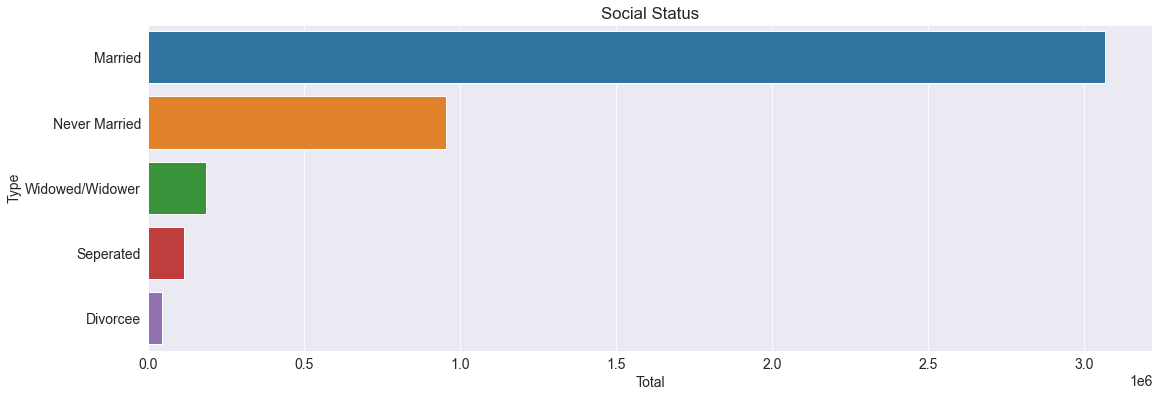

In [32]:
data5 = suicide_df[suicide_df['Type_code']=='Social_Status']
reasons = data5.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
plt.figure(figsize=(18,6))
plt.title("Social Status")
sns.barplot(y='Type',x='Total',data=suicide_reasons);

The above graph shows the marital status of the people who committed suicide. It seems that married people commit more suicide then unmarried ones

### Now we will try to find which age group commits more suicide

In [33]:
age_grp = suicide_df.groupby('Age_group')['Total'].sum()
age = pd.DataFrame(age_grp).reset_index()
age = age[1:]
age

,Age_group,Total
1,0-14,98410
2,15-29,1534037
3,30-44,1471599
4,45-59,885177
5,60+,346925


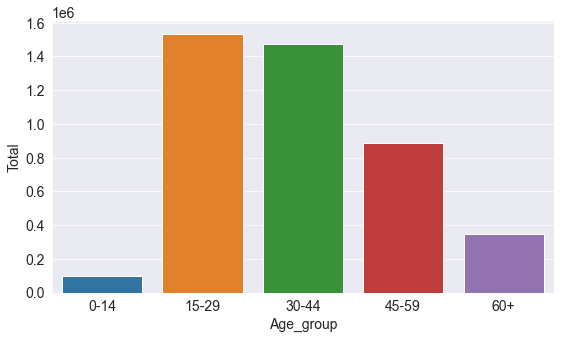

In [34]:
sns.barplot(x='Age_group',y='Total',data=age);

Clearly people aged between 15-45 committed more number of suicides.

The data which is shocking is that children under age of 14 also committed suicides.

Let us save and upload our work to Jovian before continuing

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "email-rkroy/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"
[jovian] Error: Failed to read pip environment using command: "pip --disable-pip-version-check freeze"


[jovian] Committed successfully! https://jovian.ml/email-rkroy/suicides-in-india


'https://jovian.ml/email-rkroy/suicides-in-india'

## Asking and Answering Questions

In this section we will ask few questions and try to find their answers.

### Q1: Do males commit more suicides or females?

In [44]:
gen = suicide_df.groupby('Gender')['Total'].sum()
gender = pd.DataFrame(gen).reset_index()
gender

,Gender,Total
0,Female,4702974
1,Male,8368760


Let us draw a piechart to see the ratio

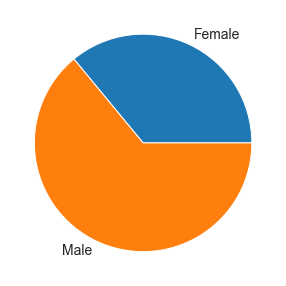

In [45]:
piex = ['Female','Male']
piey = pd.Series(gender['Total'])
fig1, ax1 = plt.subplots()
ax1.pie(piey,labels=piex)
plt.show();

From the above pie-chart, we can conclude that Males commit much more suicides then females. (Almost twice the ratio)

### Q2: How many people comitted suicides due to mental illness?

Lets find out

In [54]:
data5 = suicide_df[suicide_df['Type']=='Insanity/Mental Illness']
total=data5.Total.sum()

In [56]:
print("Total {} people commited suicides due to mental illness between 2001-2012".format(total))

Total 94229 people commited suicides due to mental illness between 2001-2012


In [68]:
reasons = data5.groupby('Year')['Total'].sum()

Lets plot an year wise chart to demonstrate how many people commit suicides per year due to mental stress.

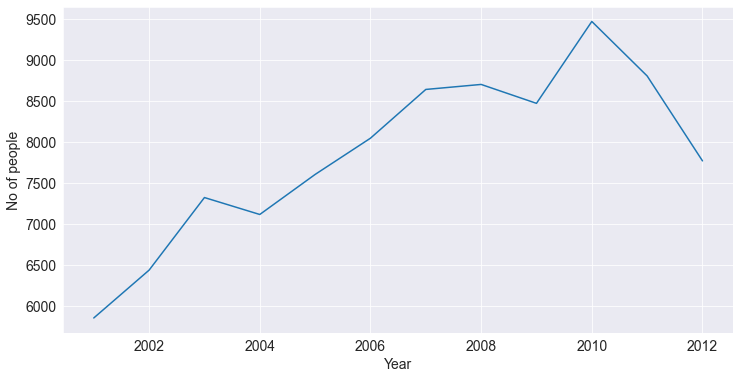

In [67]:
plt.figure(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('No of people')
plt.plot(reasons);

From the plot above we can see a general increase in the no of suicides every year due to mental stress, with the peak value reached at 2010. However its a good sign that aftr 2010 suddenly no of people commiting suicide due to mental stress started decreasing.

### Q3: Does proper education prevents people from comitting suicide?

Lets use our data4 table for that purpose

In [69]:
data4

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


In [70]:
ed_df=data4.groupby('Type')['Total'].sum()

In [73]:
ed_df

Type
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
Middle                                      1028913
No Education                                 965271
Post Graduate and Above                       22425
Primary                                     1088481
Name: Total, dtype: int64

In [81]:
count1=ed_df['No Education']
print("The number of people who are uneducated and committed suicides from 2001-2012 are: ",count1)

The number of people who are uneducated and committed suicides from 2001-2012 are:  965271


In [82]:
print("The number of people who studied till middle school and committed suicides from 2001-2012 are: ",ed_df['Middle'])

The number of people who studied till middle school and committed suicides from 2001-2012 are:  1028913


In [83]:
print("The number of people who studied till high school and committed suicides from 2001-2012 are: ",ed_df['Hr. Secondary/Intermediate/Pre-Universit'])

The number of people who studied till high school and committed suicides from 2001-2012 are:  356724


In [84]:
print("The number of people who did graduation atleast and committed suicides from 2001-2012 are: ",ed_df['Graduate'])

The number of people who did graduation atleast and committed suicides from 2001-2012 are:  93822


In [85]:
print("The number of people who are atleaast Post Graduate and above and committed suicides from 2001-2012 are: ",ed_df['Post Graduate and Above'])

The number of people who are atleaast Post Graduate and above and committed suicides from 2001-2012 are:  22425


So the conclusion that we can deduce from this is that basic education doest play any role in preventing people from commiting suicides. The no of people who are uneducated and committed suicide is almost equal to the no of people who never went to school.


However as the level of education increases, we can notice an appreciable decrease in the suicide count, and those who atleast study till they become post graduate or above, they dont commit suicides much. However we also have to keep in mind that not many people study till they become a post graduate hence the smaller numbers.. The main big thing to worry is that whether people are uneducated or they r studying till the highest levels, still people are commiting suicides and education hardly plays any role in minimizing suicides.

This is perhaps because noone is being taught how to handle stress in schools or colleges, if we are being taught that, then maybe this ratio would have further decreased.

### Q4: What is the most predominating factor for a child below 14 years to commit suicide?

 Its scary to see that even kids below 14 years of age commiting suicide. Lets find out why are doing this.

In [101]:
child_df = suicide_df[suicide_df['Age_group']=='0-14']

In [102]:
child_df

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
...,...,...,...,...,...,...,...
237263,West Bengal,2012,Means_adopted,By Self Infliction of injury,Male,0-14,1
237264,West Bengal,2012,Means_adopted,By Hanging,Male,0-14,58
237268,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,0-14,14
237269,West Bengal,2012,Means_adopted,By Other means (please specify),Male,0-14,77


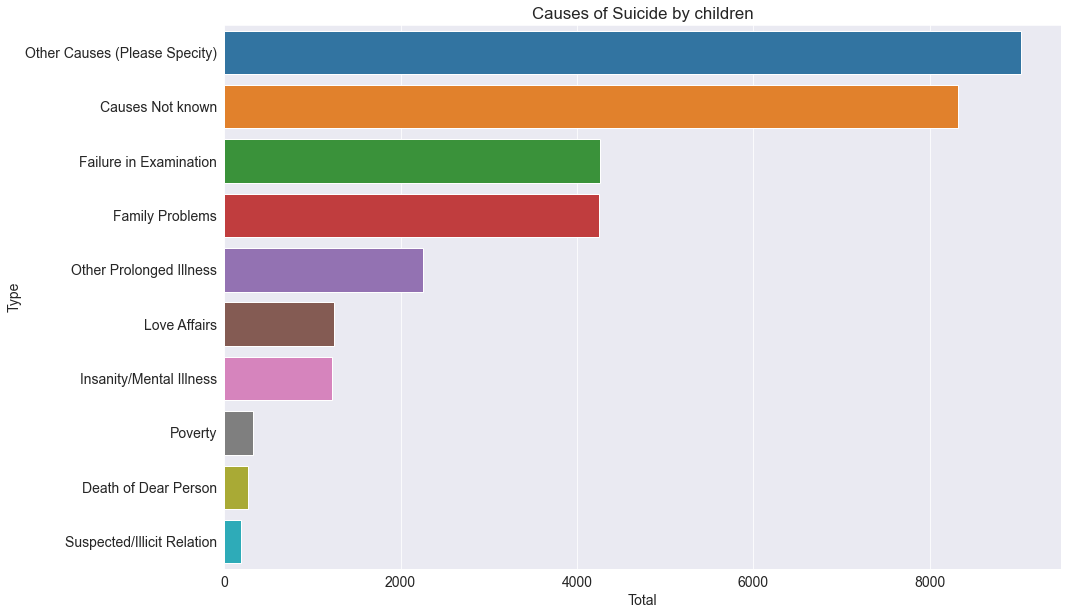

In [105]:
data7 = child_df[child_df['Type_code']=='Causes']
reasons = data7.groupby('Type')['Total'].sum()
suicide_reasons = pd.DataFrame(reasons).reset_index().sort_values('Total',ascending=False)
suicide_reasons=suicide_reasons[:10]
plt.figure(figsize=(15,10))
plt.title("Causes of Suicide by children")
sns.barplot(y='Type',x='Total',data=suicide_reasons);

Well from the above plot, the top two plots doesnt give us a much good idea as they fall into the other category, but looking at the 3rd and 4th reason we can definitely say that Failure in exams and Family problems are the two major categories for children to commit suicide.

This is why a child's parents should have a good relationship among them as family problems are also impacting with the life of the children. And the mental health of a child should also be taken care of to prevent these little futures of our country from commiting suicides.

### Q5: What is the general trend of students comitting suicide?

Lets create a student table and lets explore it.

In [109]:
student_df = suicide_df[suicide_df['Type']=='Student']

In [110]:
student_df

,State,Year,Type_code,Type,Gender,Age_group,Total
443,A & N Islands,2001,Professional_Profile,Student,Female,0-14,2
448,A & N Islands,2001,Professional_Profile,Student,Male,0-14,1
469,A & N Islands,2001,Professional_Profile,Student,Female,15-29,9
482,A & N Islands,2001,Professional_Profile,Student,Male,15-29,2
1008,A & N Islands,2002,Professional_Profile,Student,Female,0-14,2
...,...,...,...,...,...,...,...
236856,West Bengal,2011,Professional_Profile,Student,Male,0-14,92
236859,West Bengal,2011,Professional_Profile,Student,Female,15-29,404
236877,West Bengal,2011,Professional_Profile,Student,Male,15-29,426
236885,West Bengal,2011,Professional_Profile,Student,Female,30-44,7


#### Plotting yearly trend in number of suicides committed by students

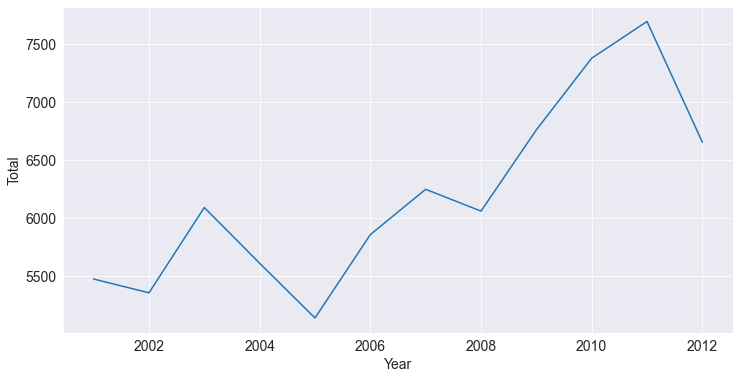

In [112]:
std_year = student_df.groupby('Year')['Total'].sum()
stdyr = pd.DataFrame(std_year).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Total',data=stdyr);

Through the graph we can see that it rises overall but does not follow a proper pattern. Maximum suicides happened in interval 2008-2011.


#### Plotting the data of students statewise.



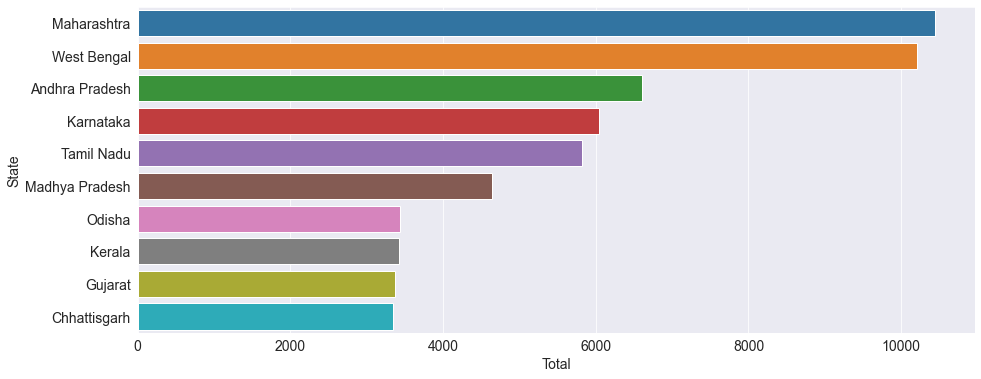

In [114]:
grp = student_df.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(y='State',x='Total',data=total_suicides);

From the above graph,we can see that students in Maharashtra and West Bengal commit the maximum number of suicides, followed by Andhra Pradesh and Karnataka.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [119]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "email-rkroy/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/email-rkroy/suicides-in-india


'https://jovian.ml/email-rkroy/suicides-in-india'

## Inferences and Conclusion

Suicide is defined as the intention of taking one's own life. Suicide is one of the leading causes of death in the world, specially among the young people. As per our data more then 1 million people die by suicide every year. This corresponds to around 1 death in every 40 seconds, which is a big reason to worry. Lack of access to appropriate care is one of the many factors that magnify the stigma associated with mental illness and with suicidal behaviour. Family problems is one of the most important factor causing suicides. While hanging themself or consuming insecticides was one of the major means adopted,the states with highest suicide rates were Maharashtra, West Bengal and Andhra Pradesh.

Also we see a gradual increase in suicide rates each year which is another reason to worry because more and more people are giving up on their lives every year. Few other things that I noticed is that generally most people in the age group 15-44 commit the maximum number of suicides. Also males commit a lot more suicides then females with almost twice the ratio.

But suicide is preventable, most people who commit suicides desperately wants to live, its just that they dont find any other alternative solution to their problems. With proper care of our loved ones, we can always prevent them from taking such measures.

In [ ]:
import jovian

In [121]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "email-rkroy/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/email-rkroy/suicides-in-india


'https://jovian.ml/email-rkroy/suicides-in-india'

## References and Future Work

National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India.
NCRB has also shared the historical data on their website. This dataset contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

Link to original dataset:- https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides

Now the dataset that we have used is old and contains data till 2012 only, so for future work we can try to find a newer dataset which contains modern day values to analyse the present day scenario, cuz as we have seen from the year graph that no of suicides per year is increasing, and with this dataset being 8 yrs old, we wont be able to predict correctly what today's situations are. Also this is just for India, we can even work out to find global statistics and what the position of India is as compared to the world. These are the few important things that we can work on in the future.

In [ ]:
import jovian

In [ ]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
